In [1]:
import os
import itertools

import numpy as np
import pandas as pd
from simpledbf import Dbf5

In [70]:
S01_Existing = 'S01_Existing'
S03_HGAC = 'S03_HGAC'
S04_HG = 'S04_HG'
S06_HG_MT = 'S06_HG_MT'
S08_HG_HT_Sprawl_TDM_N3 = 'S08_HG_HT_Sprawl_TDM_N3'
S12_HG_HT_Infill_Pricing_N3 = 'S12_HG_HT_Infill_Pricing_N3'
S14_HG_HT_Infill_Transit_N3 = 'S14_HG_HT_Infill_Transit_N3'

In [71]:
scenario = S01_Existing
workspace = r'L:\DCS\Projects\_Legacy\60563434_SWIFT\400_Technical\SWIFT_Workspace\Scenarios'

In [79]:
zone_skim_files = (
    r'STM\STM_A\03_Performance_Summarizer\04_Results\Zone_Skim_CAV_1_WK.csv',
    r'STM\STM_A\03_Performance_Summarizer\04_Results\Zone_Skim_CAV_2P_WK.csv',
    r'STM\STM_A\03_Performance_Summarizer\04_Results\Zone_Skim_REG_1_WK.csv',
    r'STM\STM_A\03_Performance_Summarizer\04_Results\Zone_Skim_REG_2P_WK.csv',
             )
# skim_files = [os.path.join(workspace, scenario, f) for f in skim_files]
# print("Input Skim Files:", skim_files)

In [80]:
def skim_hist(df_skim, bins):
    df_skim['BIN'] = pd.cut(df_skim.DISTANCE, bins)
    df_skim_gb = df_skim.groupby('BIN', as_index=False)['COUNT'].sum()
    df_skim_gb['PERCENT'] = df_skim_gb['COUNT'] / sum(df_skim_gb['COUNT'])
    return df_skim_gb

In [81]:
bins = np.arange(0, 152, 2)

In [113]:
skim_files = [os.path.join(workspace, S01_Existing, f) for f in zone_skim_files]
df_skim_s01 = pd.concat([pd.read_csv(f) for f in skim_files]).fillna(0)
df_skim_gb_s01 = skim_hist(df_skim_s01, bins)
df_skim_gb_s01 = df_skim_gb_s01[:10]

In [114]:
skim_files = [os.path.join(workspace, S03_HGAC, f) for f in zone_skim_files]
df_skim_s03 = pd.concat([pd.read_csv(f) for f in skim_files]).fillna(0)
df_skim_gb_s03 = skim_hist(df_skim_s03, bins)
df_skim_gb_s03 = df_skim_gb_s03[:10]

In [115]:
df_skim_compare = pd.concat([df_skim_gb_s01, df_skim_gb_s03], keys=['S1', 'S3']).reset_index(level=0).rename(columns={'level_0':'SCENARIO'})

In [131]:
df_skim_compare.to_csv('skim_compare.csv', index=False)

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

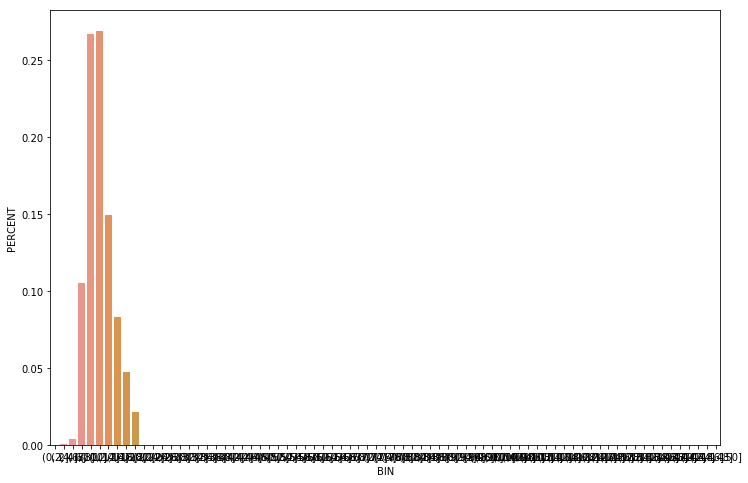

In [128]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='BIN', y="PERCENT", data=df_skim_compare.loc[df_skim_compare.SCENARIO == 'S1'], ax=ax);

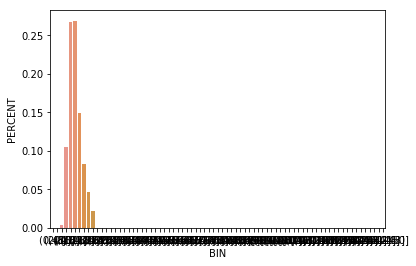

In [130]:
sns.barplot(x='BIN', y="PERCENT", data=df_skim_compare.loc[df_skim_compare.SCENARIO == 'S1',:])